## MOVING AVERAGE
A moving average is a statistical technique used to analyze data points by creating a series of averages of different subsets of the full dataset. It's commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.


**`Stationary Time Series Data:`** Moving averages are typically useful for stationary time series data. Stationary data has constant mean, variance, and autocorrelation over time. Moving averages can help smooth out noise and highlight underlying trends or patterns in stationary data.

**`Fluctuating Time Series Data:`** Moving averages can still be useful for fluctuating time series data, but their effectiveness may be limited. Fluctuating data, which exhibits changing mean, variance, or autocorrelation over time, may not be well-suited for simple moving average techniques. In such cases, `more advanced methods like exponential smoothing or ARIMA models` might be more appropriate to capture the complex dynamics of the data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
def datetime_parse(x):
    return datetime.strptime(x, '%m/%d/%Y') 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',
                 parse_dates = ['Bill_Date'], date_parser = datetime_parse)

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_38469/2534807137.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',


In [4]:
df

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.00,247.73,31
1,2016-02-01,292,1138.8,175.20,234.11,31
2,2016-03-01,130,507.0,78.00,123.85,29
3,2016-04-01,117,456.3,70.20,111.22,29
4,2016-05-01,136,530.4,81.60,118.37,29
5,2016-06-01,63,245.7,37.80,77.81,32
6,2016-07-01,110,429.0,66.00,86.67,30
7,2016-08-01,176,686.4,105.60,122.40,29
8,2016-09-01,357,1392.3,214.20,223.62,33
9,2016-10-01,235,916.5,141.00,152.54,29


In [5]:
bill_df = df.set_index('Bill_Date')

In [6]:
bill_df

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.00,247.73,31
2016-02-01,292,1138.8,175.20,234.11,31
2016-03-01,130,507.0,78.00,123.85,29
2016-04-01,117,456.3,70.20,111.22,29
2016-05-01,136,530.4,81.60,118.37,29
2016-06-01,63,245.7,37.80,77.81,32
2016-07-01,110,429.0,66.00,86.67,30
2016-08-01,176,686.4,105.60,122.40,29
2016-09-01,357,1392.3,214.20,223.62,33


In [7]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

Simple Moving average

$\frac{(t + (t-1) + (t-2) + ... + (t-n))}{n}$

can be calculate by using `rolling` function in pandas where one specifies the n using window


1. **`rolling(window = 4)`**: When you specify `window=4` in the rolling mean calculation, you're computing the mean of the current value and the three preceding values. This means the result is aligned with the last value in the window.

2. **`rolling(window = 3).shift(1)`**: On the other hand, when you apply `.shift(1)` after a window size of 3, you're shifting the rolling mean one step forward. This means if we  use value for $(t-3)$, $(t-2)$, and $(t-1)$ , we will generate value for $(t+1)$ instead of $t$, because the value has been shifted by 1.
 
**The purpose of shifting is to align the rolling mean values with future timestamps. This can be useful for forecasting or analyzing relationships between the rolling mean and future observations.**

In [8]:
bill_2018['ma_rolling3_shift1'] = bill_2018['Billed_amount'].rolling(window = 3).mean().shift(1)

In [9]:
bill_2018['ma_rolling_4'] = bill_2018['Billed_amount'].rolling(window = 4).mean()

In [10]:
bill_2018

,Billed_amount,ma_rolling3_shift1,ma_rolling_4
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,179.2275
2016-05-01,118.37,156.393333,146.8875
2016-06-01,77.81,117.813333,107.8125
2016-07-01,86.67,102.466667,98.5175
2016-08-01,122.40,94.283333,101.3125
2016-09-01,223.62,95.626667,127.6250


<Axes: xlabel='Bill_Date'>

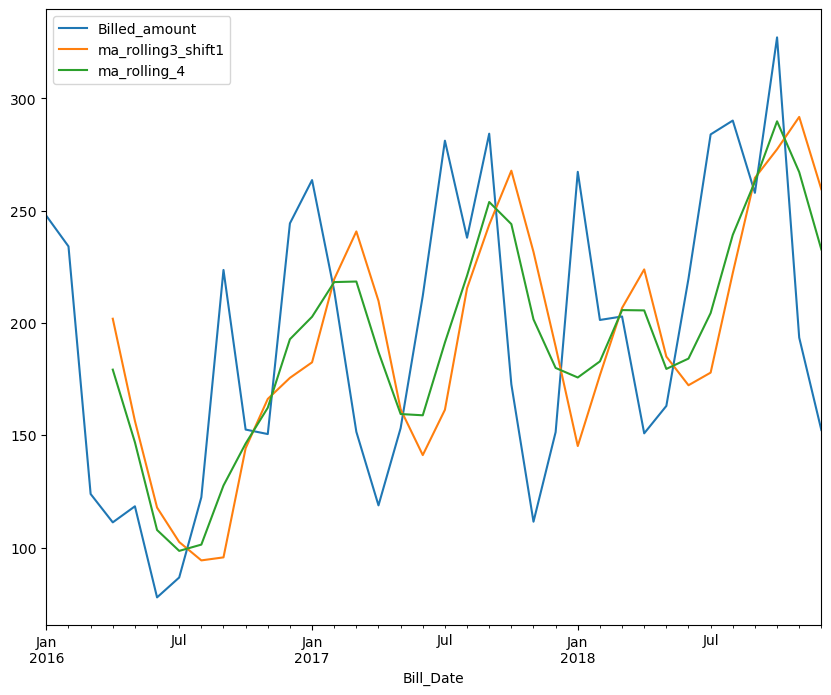

In [11]:
bill_2018.plot()

### Weighted moving average 

A weighted moving average is a variation of the simple moving average that assigns different weights to data points, allowing for more flexible smoothing of time series data.

w= weighting factor

$\frac{t * w_{t} + (t-1) *  w_{t-1} + (t-n) * w_{t-n}}{n}$

Advantages of Weighted Moving Average:
- **Flexibility**: Allows assigning different weights to data points, adapting to various patterns in the data.
- **Smoothing**: Smooths out short-term fluctuations while highlighting long-term trends.
- **Adaptability**: Can be adjusted to better capture underlying dynamics in the data.

Drawbacks of Weighted Moving Average:
- **Subjectivity**: Weight selection is subjective and requires careful consideration.
- **Complexity**: Involves more complex calculations compared to simple moving averages.
- **Potential Overfitting**: Risk of overfitting to historical patterns, potentially affecting future generalization.

In [12]:
def wma(weights):
    def calc(x):
        return (weights * x).mean()
    return calc

In [13]:
bill_2018['Billed_amount'].rolling(window = 3).apply(wma(np.array([0.5, 1, 1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [14]:
bill_2018['wma_rolling_3'] = bill_2018['Billed_amount'].rolling(window = 3).apply(wma(np.array([0.5, 1, 1.5]))).shift(1)

In [15]:
bill_2018

,Billed_amount,ma_rolling3_shift1,ma_rolling_4,wma_rolling_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN
2016-04-01,111.22,201.896667,179.2275,181.250000
2016-05-01,118.37,156.393333,146.8875,135.911667
2016-06-01,77.81,117.813333,107.8125,116.900000
2016-07-01,86.67,102.466667,98.5175,96.898333
2016-08-01,122.40,94.283333,101.3125,89.000000
2016-09-01,223.62,95.626667,127.6250,103.058333


<Axes: xlabel='Bill_Date'>

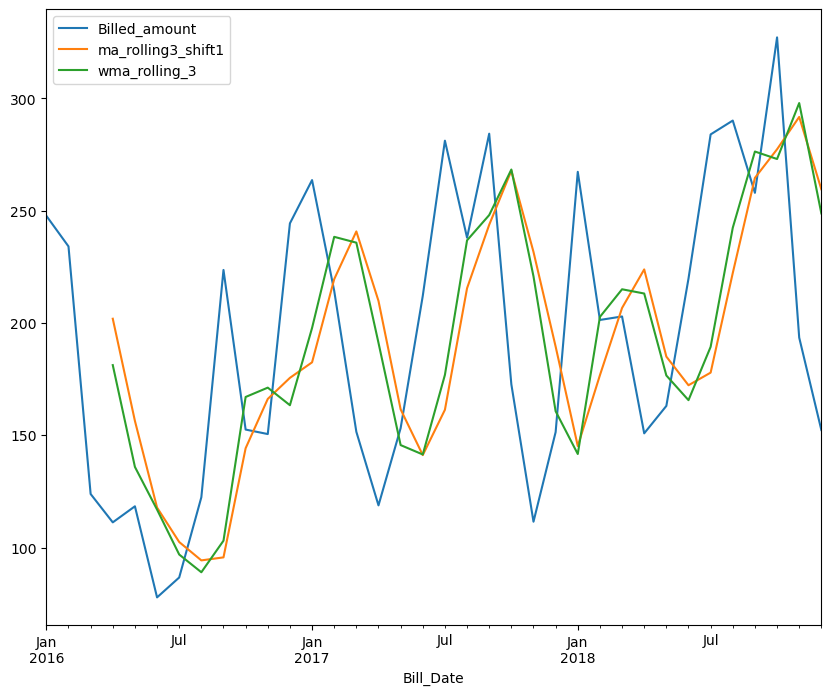

In [16]:
bill_2018[['Billed_amount','ma_rolling3_shift1', 'wma_rolling_3']].plot()

### Exponential moving average

calculates the weights better unlike weighted moving average where we have to provide weights on our own


The formula for calculating the exponential moving average (EMA)  is as follows:

$ Y_t = (1 - \alpha) \times Y_{t-1} + \alpha \times X_t $

Where:
- $Y_t $ is the exponential moving average at time \( t \).
- $Y_{t-1}$ is the exponential moving average at the previous time step.
- $X_t $ is the value of the time series at time \( t \).
- $\alpha$ is the smoothing factor, often referred to as the smoothing constant or weight. It determines the rate at which older observations decay and how much importance is given to newer observations.

A higher $\alpha$ value gives more weight to recent observations, making the EMA more responsive to changes but potentially more volatile. Conversely, a lower $\alpha$ value gives more weight to past observations, resulting in smoother but less responsive EMA. Commonly used values for $\alpha$ range between 0 and 1, with higher values corresponding to more recent data and lower values corresponding to older data.


One can also specify `span` parameter instead of the `$\alpha$`. NOTE: $\alpha$ and span are related  The span parameter specifies the number of observations to include in the calculation of the decay factor. Smaller values of span result in a faster decay of weights for older observations, making the EMA more responsive to recent data. 

In [17]:
bill_2018['ewm_window_3'] = bill_2018['Billed_amount'].ewm(span = 3, adjust = False).mean().shift(1)

In [18]:
bill_2018

,Billed_amount,ma_rolling3_shift1,ma_rolling_4,wma_rolling_3,ewm_window_3
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,179.2275,181.250000,182.385000
2016-05-01,118.37,156.393333,146.8875,135.911667,146.802500
2016-06-01,77.81,117.813333,107.8125,116.900000,132.586250
2016-07-01,86.67,102.466667,98.5175,96.898333,105.198125
2016-08-01,122.40,94.283333,101.3125,89.000000,95.934063
2016-09-01,223.62,95.626667,127.6250,103.058333,109.167031


<Axes: xlabel='Bill_Date'>

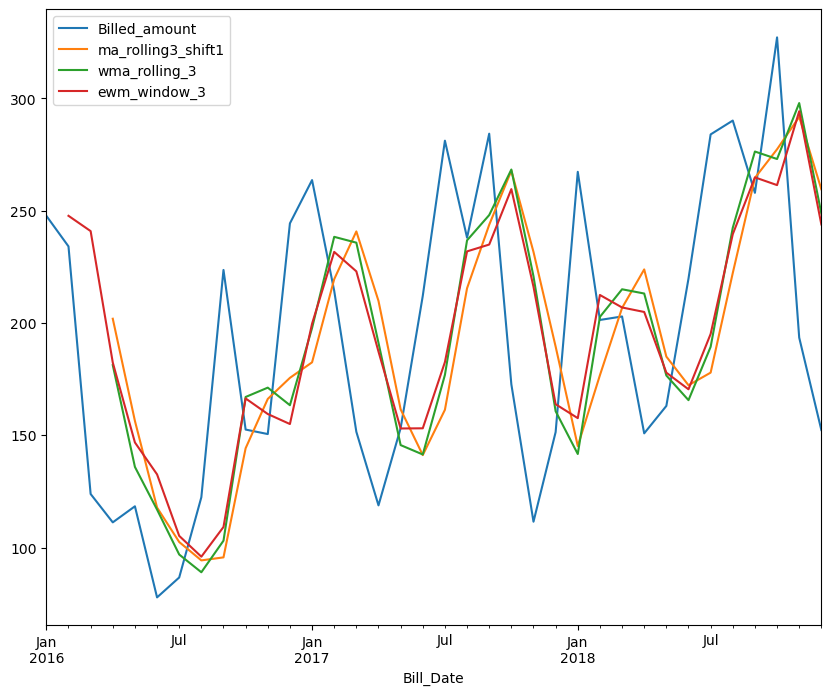

In [19]:
bill_2018[['Billed_amount','ma_rolling3_shift1', 'wma_rolling_3', 'ewm_window_3']].plot()

In [20]:
# using alpha=smoothening parameter instead of span
bill_2018['ewm_window_3_alpha0.7'] = bill_2018['Billed_amount'].ewm(alpha = 0.7, adjust = False, min_periods = 3).mean().shift(1)

In [21]:
bill_2018

,Billed_amount,ma_rolling3_shift1,ma_rolling_4,wma_rolling_3,ewm_window_3,ewm_window_3_alpha0.7
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,NaN,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,179.2275,181.250000,182.385000,158.153800
2016-05-01,118.37,156.393333,146.8875,135.911667,146.802500,125.300140
2016-06-01,77.81,117.813333,107.8125,116.900000,132.586250,120.449042
2016-07-01,86.67,102.466667,98.5175,96.898333,105.198125,90.601713
2016-08-01,122.40,94.283333,101.3125,89.000000,95.934063,87.849514
2016-09-01,223.62,95.626667,127.6250,103.058333,109.167031,112.034854


<Axes: xlabel='Bill_Date'>

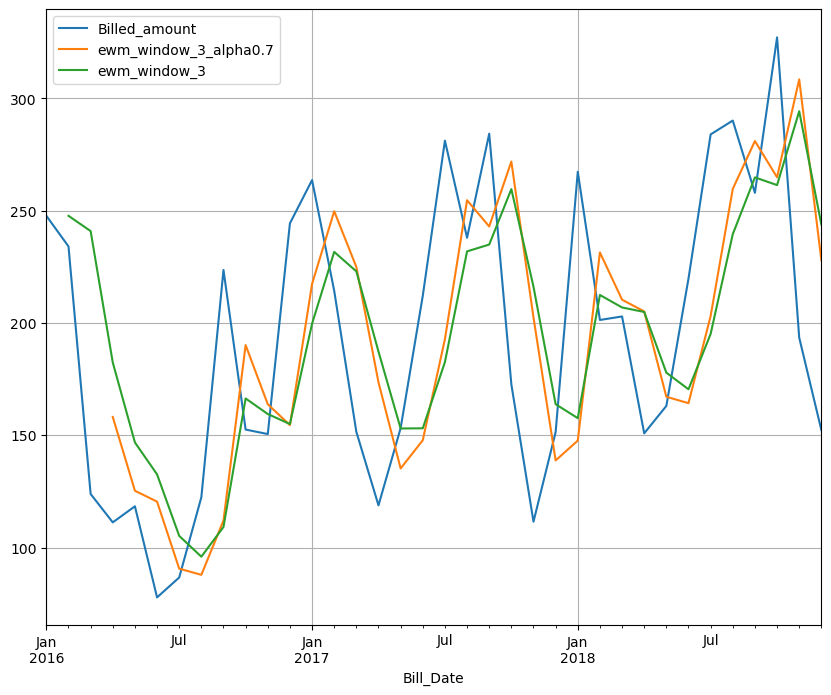

In [22]:

bill_2018[['Billed_amount', 'ewm_window_3_alpha0.7', 'ewm_window_3']].plot(grid = True)

In [23]:
bill_2018['ewm_window_3_alpha0.3'] = bill_2018['Billed_amount'].ewm(alpha = 0.3, adjust = False, min_periods = 3).mean().shift(1)

<Axes: xlabel='Bill_Date'>

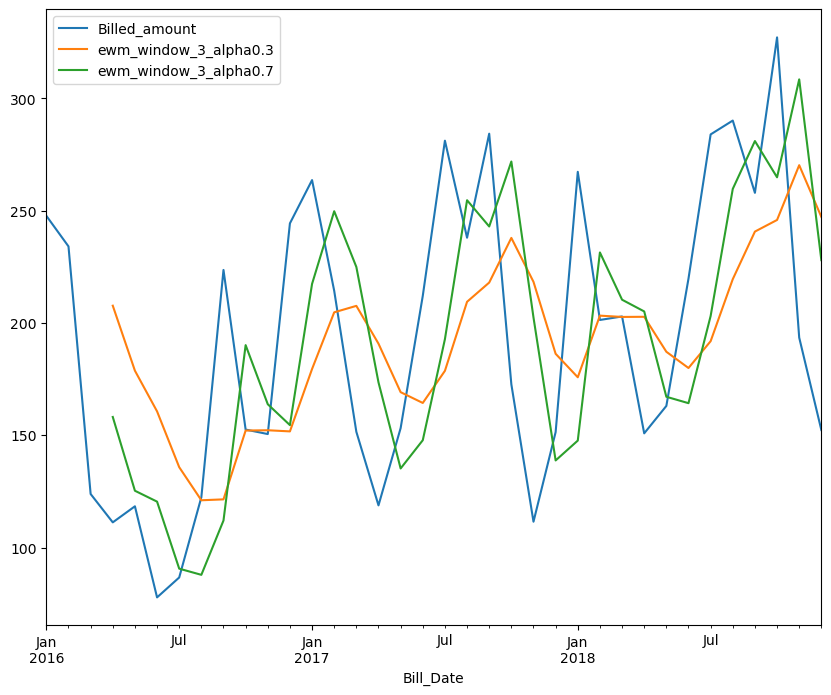

In [25]:
bill_2018[['Billed_amount','ewm_window_3_alpha0.3', 'ewm_window_3_alpha0.7']].plot()

#### Looking at RMSE

$\sqrt{\sum_{i=1}^{n}\frac{(y-y_p)^2}{n}}$

In [26]:
def rmse_val(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [39]:
features = bill_2018.columns.to_list()

In [47]:
for i in features:
    if (i != 'Billed_amount'):
        print(i + '   ' , rmse_val(bill_2018['Billed_amount'], bill_2018[i]))


ma_rolling3_shift1    70.98561687433802
ma_rolling_4    53.23921265575351
wma_rolling_3    65.82572602256133
ewm_window_3    64.32131239414655
ewm_window_3_alpha0.7    61.26408398853503
ewm_window_3_alpha0.3    65.22424423118376
